## Background: 

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

## Objective:

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

Explore the dataset and extract insights using Exploratory Data Analysis.
Do the users spend more time on the new landing page than the old landing page?
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Does the converted status depend on the preferred language?
Is the mean time spent on the new page same for the different language users?
*Consider a significance level of 0.05 for all tests.

## Data Description:

* user_id - This represents the user ID of the person visiting the website.
* group - This represents whether the user belongs to the first group (control) or the second group (treatment).
* landing_page - This represents whether the landing page is new or old.
* time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
* converted - This represents whether the user gets converted to a subscriber of the news portal or not.
* language_preferred - This represents the language chosen by the user to view the landing page.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy import stats

In [369]:
df = pd.read_csv('abtest.csv')

In [370]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [371]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [372]:
df.shape

(100, 6)

In [373]:
# Check for missing value in any colum
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


### There are no missing values in this data set

### Q1 : 
Exploring the data and conducting some preliminary analysis

In [378]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


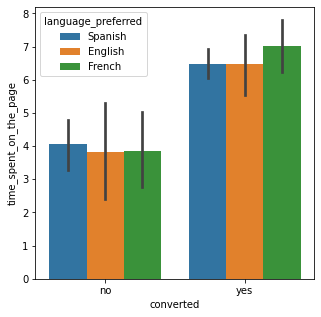

In [379]:
plt.figure(figsize=(5,5))
sns.barplot(data=df,x='converted',y='time_spent_on_the_page',hue='language_preferred')
plt.show()

In [380]:
###### Check if there is the language preferred drives the conversion ratio.

# calculate the user counts all users for each language preferred
df_total_user_cnt_by_language = df.groupby([df['language_preferred']]).agg(total_user_count = ('converted' , 'count')).reset_index()

# calculate the user counts of ONLY CONVERTED users for each language preferred
converted_user_language = df.groupby('language_preferred')
converted_user_language = converted_user_language.apply(lambda x: x[x['converted'] == 'yes']['converted'].count()).reset_index(name='converted_user_count')
converted_user_language

# Merge the total user count data and conversion count data joined by preferred language
df_conversion_data_by_language = pd.merge(df_total_user_cnt_by_language ,converted_user_language , how = 'inner' , on = 'language_preferred'  )

# Calculate the conversion rate
df_conversion_data_by_language ['conversion_rate (%)'] = round(df_conversion_data_by_language['converted_user_count']/df_conversion_data_by_language['total_user_count'], 2)*100
print(df_conversion_data_by_language)



  language_preferred  total_user_count  converted_user_count  \
0            English                32                    21   
1             French                34                    15   
2            Spanish                34                    18   

   conversion_rate (%)  
0                 66.0  
1                 44.0  
2                 53.0  


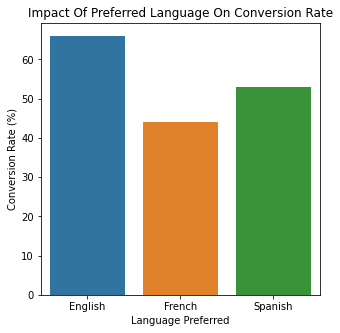

In [381]:
# Plot the above data to visualize the impact of language of the webpage on the conversion ratio
plt.figure(figsize=(5,5))
sns.barplot(data=df_conversion_data_by_language,x='language_preferred',y = 'conversion_rate (%)')
plt.title("Impact Of Preferred Language On Conversion Rate")
plt.xlabel("Language Preferred")
plt.ylabel("Conversion Rate (%)")
plt.show()


### Insight:
It appears that the language does have some impact on the conversion rate with english webpages experiencing a higher conversion rate than the rest. But further analysis is needed to verify if this difference in conversion rate is significant enough

In [382]:
# Calculate the average time spent on the webpage for users who subscribed to the platform vs those who did not subscribe
# This is to check if the time spent(user engagement) has any impact on the conversion rate
df_conv_grp = df.groupby([df['converted']]).agg(user_count = ('converted' , 'count'),total_time_spent = ('time_spent_on_the_page' , 'sum')  ).reset_index()
df_conv_grp['avg_time_spent (mins)'] = round(df_conv_grp['total_time_spent'] / df_conv_grp['user_count'],2)
df_conv_grp = df_conv_grp.sort_values(by='user_count',ascending=False) # sort in descending order
df_conv_grp = df_conv_grp.head(10)
df_conv_grp

,converted,user_count,total_time_spent,avg_time_spent (mins)
1,yes,54,357.65,6.62
0,no,46,180.13,3.92


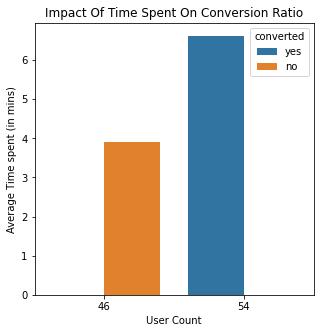

In [383]:
# Plot the above data to visualize the impact of time spent on the conversion ratio
plt.figure(figsize=(5,5))
sns.barplot(data=df_conv_grp,x='user_count',y = 'avg_time_spent (mins)' , hue='converted')
plt.title("Impact Of Time Spent On Conversion Ratio")
plt.xlabel("User Count")
plt.ylabel("Average Time spent (in mins)")
plt.show()

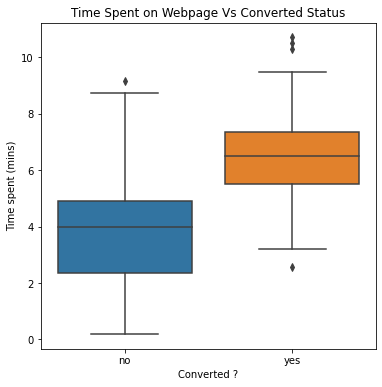

In [384]:
# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "converted", y = 'time_spent_on_the_page' , data = df)
a.set_title("Time Spent on Webpage Vs Converted Status", fontsize=12)
plt.xlabel("Converted ?")
plt.ylabel("Time spent (mins)")
plt.show()


### Insight : 
It appears that users who tend to spend more time on the page tend to have a higher conversion rate. This implies that the more the user engages on the webpage, the more likely is he to convert to a subscriber.

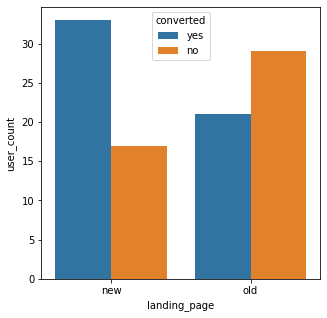

In [385]:
df_conv_grp = df.groupby([df['landing_page'],df['converted']]).agg(user_count = ('converted' , 'count')).reset_index()
df_conv_grp = df_conv_grp.sort_values(by='user_count',ascending=False) # sort in descending order
df_conv_grp = df_conv_grp.head(10)
df_conv_grp

plt.figure(figsize=(5,5))
sns.barplot(data=df_conv_grp,x='landing_page',y='user_count',hue='converted')
plt.show()

### Insight: 
The conversion rate for new landing page seems to be higher than the conversion rate for old landing page.

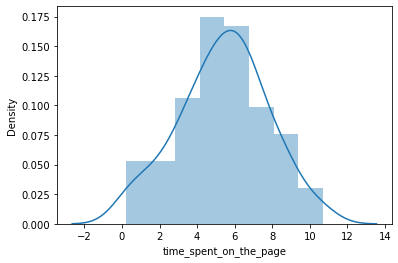

In [386]:
# Ignore any warnings
import warnings
warnings.simplefilter("ignore")

# plots a frequency polygon superimposed on a histogram using the seaborn package.
sns.distplot(df['time_spent_on_the_page'])
plt.show()


### Insight: 
The time spent on page across all users follows a normal distribution

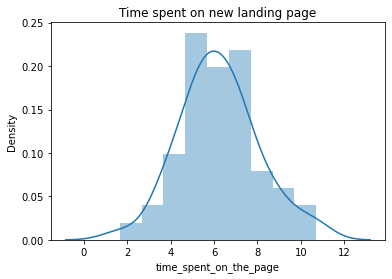

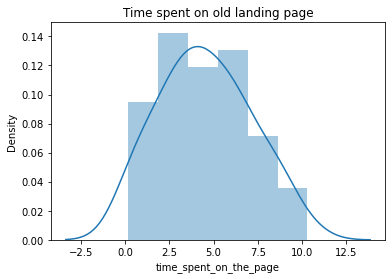

In [388]:
# extract the data for new page and old page and store in 2 different dataframes
df_new = df[df['landing_page']== 'new']
df_old = df[df['landing_page']== 'old']

# plot density distribution graph for time spend on new landing page
sns.distplot(df_new['time_spent_on_the_page'])
plt.title("Time spent on new landing page")
plt.show()

# plot density distribution graph for time spend on old landing page
sns.distplot(df_old['time_spent_on_the_page'], kde='False')
plt.title("Time spent on old landing page")
plt.show()


In [389]:
# print the mean and std dev for time spent on new page and old page

print( "mean for time spent for by users on new landing page is " , df_new['time_spent_on_the_page'].mean())
print( "mean for time spent for by users on old landing page is " , df_old['time_spent_on_the_page'].mean())
print( "standard deviation for time spent for by users on new landing page is " , df_new['time_spent_on_the_page'].std())
print( "standard deviation for time spent for by users on old landing page is " , df_old['time_spent_on_the_page'].std())


mean for time spent for by users on new landing page is  6.2232
mean for time spent for by users on old landing page is  4.532400000000001
standard deviation for time spent for by users on new landing page is  1.8170310387878263
standard deviation for time spent for by users on old landing page is  2.581974849306046


### Insight : 
On an average , the users on old landing page spent relatively lesser time than users on new landing page. Also as seen from data above and the graphs , the time spent by users on old landing page has higher standard deviation than that of new landing page

In [390]:
# Mean time spent for users using new page Vs old Page
df_mean_time = df.groupby(['landing_page'])['time_spent_on_the_page'].mean().reset_index()
print( "Mean time spent by users on new ;landing page and old landing page : \n" , df_mean_time , " \n")

# Mean time spent on the old landing page for each of the 3 different language
df_mean_time_old = df[df['landing_page']=='old'].groupby(['language_preferred'])['time_spent_on_the_page'].mean().reset_index()
print( "Mean time spent on the old landing page for each of the 3 different language : \n" , df_mean_time_old)

# Mean time spent on the new landing page for each of the 3 different language
df_mean_time_new = df[df['landing_page']=='new'].groupby(['language_preferred'])['time_spent_on_the_page'].mean().reset_index()
print( "Mean time spent on the onew landing page for each of the 3 different language : \n" , df_mean_time_new)

Mean time spent by users on new ;landing page and old landing page : 
   landing_page  time_spent_on_the_page
0          new                  6.2232
1          old                  4.5324  

Mean time spent on the old landing page for each of the 3 different language : 
   language_preferred  time_spent_on_the_page
0            English                4.454375
1             French                4.310000
2            Spanish                4.828235
Mean time spent on the onew landing page for each of the 3 different language : 
   language_preferred  time_spent_on_the_page
0            English                6.663750
1             French                6.196471
2            Spanish                5.835294


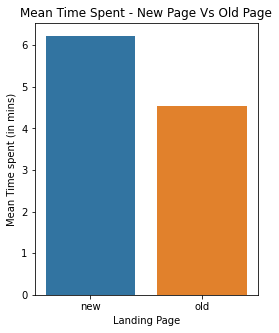

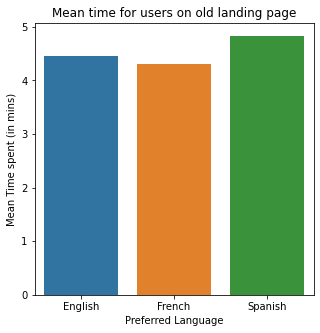

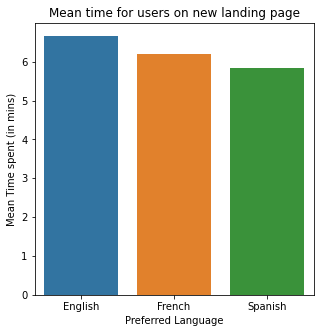

In [359]:
# Plot a Bar graph for mean time spent on both old Vs new landing page
plt.figure(figsize=(4,5))
sns.barplot(data=df_mean_time,x='landing_page',y='time_spent_on_the_page')
plt.title("Mean Time Spent - New Page Vs Old Page")
plt.xlabel("Landing Page")
plt.ylabel("Mean Time spent (in mins)")
plt.show()

# Plot a Bar graph for mean time spent on the old landing page
plt.figure(figsize=(5,5))
sns.barplot(data=df_mean_time_old,x='language_preferred',y='time_spent_on_the_page')
plt.title("Mean time for users on old landing page")
plt.xlabel("Preferred Language")
plt.ylabel("Mean Time spent (in mins)")
plt.show()

# Plot a Bar graph for mean time spent on the new landing page
plt.figure(figsize=(5,5))
sns.barplot(data=df_mean_time_new,x='language_preferred',y='time_spent_on_the_page')
plt.title("Mean time for users on new landing page")
plt.xlabel("Preferred Language")
plt.ylabel("Mean Time spent (in mins)")
plt.show()



### Insight:
The mean time spent by users on new landing page (6.22) is higher than that on old landing page (4.53). The mean time spent by users is not same across languages. The mean time spent for users on new landing page seems to have increased across all languages, with english language seeing the highest increase, possibly implying that the new page has more impact on the english language page users. Although the significnace of these claims/impacts needs to be tested to draw by doing a deep dive statsitical analysis (below).

### Next Step - Statistical Analysis : 
We need to compare the above exploratory data analysis against the statistical analysis to see if any of the above findings are statistically significant to arrive at those corresponding conclusions

### Q2 :
**Do the users spend more time on the new landing page than the old landing page?**

We saw eariler that the mean time spent by users on new landing page (6.22) is higher than mean time spent on old landing page (4.53). But we need to check if this is statistically significant.

This is a 2 independent sample problem as the populations are different (users using the new landing page are different than users using the old landing page). And since we need to verify if mean time spent on new landing page is **greater than** that of old landing page, this falls under a one-tailed hypothesis. Since we need to test for the equality of means , a t-distribution statistic could potentially be used if the assumptions are met.

### The null and alternative hypothesis :


Let $\mu_1, \mu_2$ be the mean time spent on **old** and **new** landing page respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1<\mu_2$

In [391]:
# Calculate the mean & std dev for the time spent on the old page vs new landing page 

mu_old = round(df[df['landing_page'] == 'old']['time_spent_on_the_page'].mean() , 2)
mu_new = round(df[df['landing_page'] == 'new']['time_spent_on_the_page'].mean() , 2)
sigma_old = round(df[df['landing_page'] == 'old']['time_spent_on_the_page'].std() , 2)
sigma_new = round(df[df['landing_page'] == 'new']['time_spent_on_the_page'].std() , 2)

# Print the above mean and std dev
print("Mean time spent on old page is {0}".format(mu_old))
print("Mean time spent on new page is {0}".format(mu_new))
print("standard deviation of time spent on old page is {0}".format(sigma_old))
print("standard deviation of time spent on new page is {0}".format(sigma_new))

Mean time spent on old page is 4.53
Mean time spent on new page is 6.22
standard deviation of time spent on old page is 2.58
standard deviation of time spent on new page is 1.82


In [392]:
# Create a subset of the dataframe and split the time spent on new landing page and old landing page into 2 columns

df_subset = (
    df.pivot_table(index=df.groupby('landing_page').cumcount(),
                   columns='landing_page',
                   values='time_spent_on_the_page')
        .add_prefix('landing_page_')
        .rename_axis(columns=None)
)

df_subset.head()


,landing_page_new,landing_page_old
0,7.13,3.48
1,4.40,3.02
2,4.75,5.28
3,5.25,6.53
4,10.71,2.08


**Let's test whether the T-test assumptions are satisfied or not**

1. Continuous data - "Time Spent" is measured on a continuous scale.

2. Normally distributed populations - As we saw in the earliler part of exploratory data analysis above , the time spent is normally distributed.

3. Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.

4. Unequal population standard deviations - As the sample standard deviations are different (time spent on old page 2.58 and time spent on new page 1.82), the population standard deviations may be assumed to be different.

5. Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

Since all the above conditions are met, we can use a the **Two Independent Sample T-test** to check for the equality of means for sample of unequal std dev

###  Estimate the p-value :

In [393]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(df_subset['landing_page_new'], df_subset['landing_page_old'].dropna(), equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)


The p-value is  0.0001392381225166549


### Insight/Conclusion
As the p-value (~0.00013) is less than the level of significance, we can reject the null hypothesis that the mean time spent on new landing page is equal to or less than that of old landing page. Hence, we **do have** enough evidence to support the claim that mean time spent on new landing page is significantly higher than mean time spent on old landing page.

### Q3 : 
**Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?**

We are required to compare the proportion (conversion rate) of 2 different samples and make our conclusion. Since we have 2 different samples and we are asked to compare the proportion, this could potentially qualify for a 2 sample Z test analysis with one-tailed hypothesis.

## Test of proportions 

* **landing_page** and **converted** are two categorical variables
* We want to see if the proportion of conversion for the **new landing page** is significantly higher than it is for the **old landing page**


**$H_0:$
The proportion of conversion for the new landing page (P2) is less than or equal to the proportion of conversion for the old landing page (P1).
P1 == P2**

**$H_a:$ The proportion for conversion in the new landing page (P2) is significantly higher than the proportion of conversion for the old landing page (P1). 
P1 < P2**

In [394]:
########### Given ########################
# total number of users in old landing page (control group) = 50
# total number of users in new landing page (treatment group) = 50
# Lets verify this user count for control group and treatment group from the data given

# Get the user count for old and new landing page
user_ct_by_ctrl_grp = df.landing_page.value_counts()
print('User count for old landing page(control group) is {0} and for new landing page (treatment group) is {1}'.format(user_ct_by_ctrl_grp['old'] ,user_ct_by_ctrl_grp['new']) )

# Total number of old page user group users who converted
old_page_conv_users = df[(df['landing_page']=='old') & (df['converted']=='yes')].converted.value_counts()[0]
print(" # of old landing page users who converted" , old_page_conv_users)

# Total number of new landing page group users who converted
new_page_conv_users = df[(df['landing_page']=='new') & (df['converted']=='yes')].converted.value_counts()[0]
print(" # of new landing page users who converted" , new_page_conv_users)


User count for old landing page(control group) is 50 and for new landing page (treatment group) is 50
 # of old landing page users who converted 21
 # of new landing page users who converted 33


In [395]:
# Estimate proportions (i.e conversion rate)
p_old = round(old_page_conv_users/50 , 2)
p_new = round(new_page_conv_users/50 , 2)

print('Conversion rate for old landing page is {0}% and for new landing page is {1}%'.format(p_old*100 , p_new*100))

Conversion rate for old landing page is 42.0% and for new landing page is 66.0%


### Preliminary Insight :
The conversion rate for new landing page is higher than that for the old landing page, which is already established from EDA analysis done in the earliler section as well. But we need to check if it is statistically significant by conducting a **Two Sample Proportion Z-test**


#### Conditions To Perform Two Sample Proportion Z-Test
*   Binomally distributed population - **Yes**, a user is either old landing page user or new landing page user.
*   Random sampling from the population - **Yes**, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - **Yes** since np and n(1-p) are both greater than 10 for new page users and old page users. (See below for more details)

Checking below to see if np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample conversion #'s respectively.

We need to check if the **$Central$  $Limit$  $Theorem$** holds and that if new users and old users are sufficiently high in number

>$np_1 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-21}{50} =29 \geq 10 \\
np_2 = 50\cdot \frac{17}{50} =17 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-17}{50} =33 \geq 10 $

Since all the conditions to carry out a Two Sample Proportion Z-Test are satisfied , we will perform a 2-sample Z test analysis to address the question

In [397]:
# import the required function to conduct a Z-Test
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
stat, pval = proportions_ztest([old_page_conv_users,new_page_conv_users] , [50, 50], alternative = 'smaller')

# print the conclusion based on p-value
if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant at a 0.05 significance level. So, we reject the null hypothesis.')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant at a 0.05 significance level. So, we fail to reject the null hypothesis.')

With a p-value of 0.008 the difference is significant at a 0.05 significance level. So, we reject the null hypothesis.


### Insight/Conclusion:
With a p-value of 0.008, at a 0.05 significance level, we can reject the null hypothesis that states that the comversion rate for old landing page and new landing page is the same. We have sufficient evidence to support the alternative hypothesis that the conversion rate for new landing page is significantly higher than that of old landing page.

### Q4 :
**Does the converted status depend on the preferred language?**

We need to find out if converted status is indepdent of preferred language. Since we need to check the dependency of 2 independent categorical variables, we can use Chi-Square test of indepence, provided the required conditions for the test are met.

In [398]:
# Creating a contigency table for language_preferred and converted status
cont_table = pd.crosstab(df.language_preferred , df.converted)
cont_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Let's write the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ Converted status is independent of preferred language.

against the alternate hypothesis

>$H_a:$ Converted status is dependent on preferred language.

### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes - As seen from the contingency table above, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Since all the conditions to carry out a Chi-Square distribution is met, we will use this statistic to check for the dependency of converted status on preferred language.

### Estimating the p-value :

In [399]:
# import the required function to carry out chi-square test
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(cont_table)
print('The p-value is', p_value)



The p-value is 0.2129888748754345


### Insight/Conclusion
As the p-value of 0.213 is higher than the significance level of 0.05, we fail to reject the null hypothesis. Hence,at a 5% significance level, we do not have enough statistical evidence to conclude that converted status is dependent on the language preferred.

### Q5 :
**Is the mean time spent on the new page same for the different language users?**

We are required to do a bi-variate analysis with one discrete variable (preferred language) and one continuous variable , by comparing means of 3 populations. We can use the one-way ANOVA F-test, provided the required conditions are met.

### The null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means time spent for users with language preference for Spanish, French and English respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one peferred language has a different mean time spent than the others.

In [400]:
# Get the dataset filtered for new page users
df_new_page = df[df['landing_page'] == 'new']

# get the count of new page users (levels of factor) for each of 3 language_preferred
df_new_page['language_preferred'].value_counts()

Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


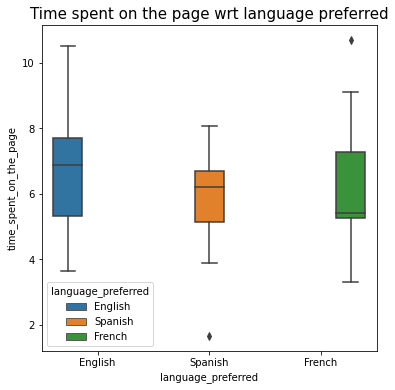

In [401]:
# mean of time spent on the page at different preferred language (levels of factor)
print(df_new_page.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = df_new_page, hue = 'language_preferred')
a.set_title("Time spent on the page wrt language preferred", fontsize=15)
plt.show()

Time spent by users on the new landing page with preferred language as English is more widely spread than time spent by users for other 2 languages

Now, the normality and equality of variance assumptions need to be checked.
* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.
* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

Test the null hypothesis

>$H_0:$ `Time spent on the page` follows a normal distribution

against the alternative hypothesis

>$H_a:$ `Time spent on the page` does not follow a normal distribution

In [402]:
# Assumption 1: Check for Normality

# import the required function to carry out Shapiro-Wilk's test
from scipy import stats

# find the p-value using Shapiro-Wilk's test
w, p_value = stats.shapiro(df_new_page['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the time spent on the page follows the normal distribution. This is also established in our EDA analysis in the earliler section here by plotting a distplot which depicts that the graph to follow a normal distribution curve.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal i.e variance time spent on the page for the 3 different preferred languages are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest i.e variance time spent on the page for atleast one preferred languages is different from the rest

In [403]:
#Assumption 2: Check for Homogeneity of Variance

#import the required function to carry out Levene's test
from scipy.stats import levene

# Calculate the p value using levene's test
statistic, p_value = levene( df_new_page['time_spent_on_the_page'][df_new_page['language_preferred']=="English"], 
                                   df_new_page['time_spent_on_the_page'][df_new_page['language_preferred']=="French"], 
                                   df_new_page['time_spent_on_the_page'][df_new_page['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances. Therefore we have enough statistical evidence to disprove the alternate hypothesis that atleast one variance in time spent for one preferred language is diffent from the rest of the languages

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.



### Estimating the p-value

In [404]:
#import the required function for one way F-test (ANOVA)
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df_new_page.loc[df_new_page['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df_new_page.loc[df_new_page['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df_new_page.loc[df_new_page['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Insight/Conclusion
As the p-value (0.43) is higher than the significance level, we fail to reject the null hypothesis. Hence, we cannot conclude that at least one language has mean time spent that is significantly different from the rest, at 5% significance level.
